In the first notebook [notebook_01_webscraping_Evanescence_Within_Temptation.ipynb](http://localhost:8888/notebooks/Project_Evanescence_Within_Temptation/notebook_01_webscraping_Evanescence_Within_Temptation.ipynb) of this project we used web scrapping to obtain lyrics of `Evanescence` and `Within Temptation`. After that we used Spotify API to retrieve more details about both bands including information about them, their albums, and details about their lyrics including not only metadata (e.g. track_popularity, album_name ) but also audio features (e.g. valence, energy, tempo, liveness) [notebook_02_retrieve_Spotify_data-Evanescence_Within_Temptation.ipynb](http://localhost:8888/notebooks/Project_Evanescence_Within_Temptation/notebook_02_retrieve_Spotify_data-Evanescence_Within_Temptation.ipynb).

Now is time to use the data retrieved and try to explore and visualize as much as we can. Our goal is not only explore text data, but also visualize numeric and categorical features. 

In what concerns NLP (Natural Language Processing) I want to do some things:

1. Text analysis: Analyze both bands and compare them through their lyrics using some metrics and word clouds.
2. Sentiment analysis: Explore the sentiment, polarity, and subjectivity of the lyrics provided by [TextBlob](https://textblob.readthedocs.io/en/dev/index.html) to compare both bands through visualization.
3. I'll try also to connect metadata of tracks with the sentiment provided by lyrics to draw conclusions.
4. Analyse some of the audio features, in special the ones that have been pointed as mood features, i.e., valence and energy, and see if there is a relation between them and the sentiment of lyrics of a track.

Let’s get started!

# **Load Packages**

In [1]:
import pandas as pd
import re
import unicodedata
from nltk.corpus import stopwords
import nltk
from textblob import TextBlob
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# **Load all data**

## Lyrics

Dataframes with lyrics are loaded here.

In [2]:
df_lyrics_evanescence = pd.read_csv("./data/lyrics_evanescence_2020-02-16.csv")
df_lyrics_evanescence.sort_values(by='song_title').head(20)

,song_title,lyrics
51,4th of july,Shower in the dark day. Clean sparks driving d...
24,all that im living for,All that I'm living for. All that I'm dying fo...
60,angel of mine,You are everything I need to see. Smile and su...
15,anything for you,I'd give anything to give me to you. Can you f...
67,anywhere,"Dear my love, haven't you wanted to be with me..."
19,away from me,I hold my breath. as this life starts to take ...
41,before the dawn,Meet me after dark again. and I'll hold you. I...
17,bleed,How can I pretend that I don't see. What you h...
36,breathe no more,I've been looking in the mirror for so long.. ...
7,bring me to life,how can you see into my eyes. like open doors....


In [3]:
df_lyrics_within_temptation = pd.read_csv("./data/lyrics_within_temptation_2020-02-16.csv")
df_lyrics_within_temptation.sort_values(by='song_title').head(15)

,song_title,lyrics
42,a dangerous mind,Cause something is not right. I follow the sig...
40,a demons fate,"Ooh, ooh, ooh, ooh, ooh. Ooh, ooh, ooh, ooh, o..."
2,all i need,I'm dying to catch my breath. Oh why don't I e...
52,angels,Sparkling angel I believed. You were my saviou...
16,another day,I know you are going away. I take my love into...
71,aquarius,I hear your whispers. Break the silence and it...
26,bittersweet,If I tell you. Will you listen?. Will you stay...
43,blue eyes,Blue eyes wide to the world. Full of dreams an...
53,caged,These are the darkest clouds. They have surrou...
58,candles,Take away. These hands of darkness. Reaching f...


## Spotify's data

From all the data retrieved I'll concentrate on the track's information csv. I'll load the .csv that has already some duplicates eliminated.

In [4]:
df_tracks_evanescence = pd.read_csv("./data/info_tracks_evanescence_without_duplicates_2020-02-16.csv")
df_tracks_evanescence.sort_values(by='track_name').head(10)

,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
51,Evanescence (Deluxe Version),2011-01-01,2011,3UkDyGtriDY7NzOJbF0rIH,a new way to bleed,226400,44,NaN,0.378,0.895,1,-4.347,1,0.0531,0.00005,0.025200,0.1500,0.2580,155.946
37,The Open Door,2006-01-01,2006,4iDQezFTnOwgnrPYiqQ6TP,all that i am living for,228706,48,NaN,0.514,0.809,3,-4.396,0,0.0617,0.01210,0.000000,0.0763,0.3850,136.881
58,Lost Whispers,2016-01-01,2016,2lH8hMXxuIcjpbIok9KbUj,breathe no more b side version,228809,49,NaN,0.620,0.186,11,-8.527,0,0.0284,0.97100,0.000001,0.1170,0.2190,96.992
19,Anywhere But Home (Live),2004-01-01,2004,2zn4moJkEmIVfV83iye9t5,"breathe no more live from le zénith,france/2004",213853,33,NaN,0.562,0.431,11,-10.670,0,0.0307,0.32300,0.018500,0.9550,0.1670,108.012
1,Fallen,2003-01-01,2003,0COqiPhxzoWICwFCS4eZcp,bring me to life,235893,77,NaN,0.331,0.943,4,-3.188,0,0.0698,0.00721,0.000002,0.2420,0.2960,94.612
73,Synthesis Live,2018-12-14,2018,1rvxZ0qg96Nkr3PLhHTbCA,bring me to life live,264026,29,https://p.scdn.co/mp3-preview/87cbd661e1853b8f...,0.149,0.813,4,-5.260,0,0.0560,0.34600,0.000021,0.9140,0.2420,90.642
21,Anywhere But Home (Live),2004-01-01,2004,1AjCrY9w0edn2jAGEAkzJ7,"bring me to life live from le zénith,france/...",283760,40,NaN,0.341,0.825,4,-7.220,0,0.0622,0.02210,0.030600,0.5220,0.0398,94.992
64,Synthesis,2017-11-08,2017,4vHFFk4Vm9NWhGq2FAsTlj,bring me to life synthesis,257320,6,NaN,0.362,0.785,4,-3.876,0,0.0567,0.61000,0.000001,0.0722,0.1600,90.904
27,The Open Door,2006-01-01,2006,663Karu2rvKLdnY0eo1n3M,call me when you're sober,214706,64,NaN,0.450,0.883,7,-4.094,1,0.0524,0.00193,0.000000,0.2930,0.3280,93.410
30,The Open Door,2006-01-01,2006,6Sh05fnlrLbMfSuI8Qur6a,cloud nine,262173,44,NaN,0.125,0.893,3,-4.217,0,0.2100,0.04320,0.000085,0.1510,0.1900,194.550


In [5]:
df_tracks_within_temptation = pd.read_csv("./data/info_tracks_within_temptation_without_duplicates_2020-02-16.csv")
df_tracks_within_temptation.sort_values(by='track_name').head(10)

,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
32,The Silent Force,2004-11-15,2004,6D5ih8y9mKmCSkuZO2Up2Q,a dangerous mind,256533,34,https://p.scdn.co/mp3-preview/c2c47b037fe1394c...,0.365,0.894,6,-5.491,0,0.0727,0.071100,0.000378,0.1350,0.476,180.200
75,The Unforgiving,2011-03-25,2011,6ivwIJGFnzTRPG2dHvKA07,a demon's fate,329537,40,https://p.scdn.co/mp3-preview/cd99a3cda30d3714...,0.460,0.912,5,-3.444,0,0.0596,0.000579,0.000217,0.1040,0.311,134.074
42,The Heart Of Everything,2007-11-09,2007,0lW4J9tzxpODQ8IExSumDW,all i need,290946,24,https://p.scdn.co/mp3-preview/15ddd25586b4f62e...,0.233,0.730,10,-4.855,1,0.0449,0.201000,0.000004,0.1300,0.123,152.972
55,An Acoustic Night At The Theatre,2009-11-02,2009,1tbSP6d2KwBB2DZUJLalRZ,all i need live,320946,21,https://p.scdn.co/mp3-preview/eae98f3734badfd0...,0.368,0.674,7,-5.859,0,0.0328,0.424000,0.000000,0.9510,0.124,149.204
91,Hydra (Special Edition),2014-02-04,2014,6MubsJeQrVa0k7lJSxcdaM,and we run,230067,7,https://p.scdn.co/mp3-preview/af524142f40dcacf...,0.544,0.837,6,-4.618,0,0.0465,0.059600,0.000000,0.0698,0.159,128.980
99,Hydra (Special Edition),2014-02-04,2014,13cZ2hORsadxvc2KLUBZoA,and we run evolution track,341497,5,https://p.scdn.co/mp3-preview/fc476336bac928d0...,0.578,0.723,6,-7.949,0,0.0507,0.136000,0.000002,0.1960,0.165,129.054
131,Let Us Burn - Elements & Hydra Live In Concert,2014-11-12,2014,301osYEEEVs4EQNXZXStCi,and we run live 2014,236746,0,https://p.scdn.co/mp3-preview/3789af5d464b633f...,0.510,0.865,9,-4.793,1,0.0431,0.190000,0.000031,0.6790,0.451,129.013
27,The Silent Force,2004-11-15,2004,3TEwbiC0GhIRStn3Eabtu7,angels,240440,55,https://p.scdn.co/mp3-preview/1dbf69a32db3b4d2...,0.341,0.867,7,-4.727,0,0.0492,0.293000,0.000000,0.2570,0.200,182.023
114,Let Us Burn - Elements & Hydra Live In Concert,2014-11-12,2014,6oQdvGElasxvHYutiewDSc,angels live 2012,252226,0,https://p.scdn.co/mp3-preview/9f9cc354c35bf303...,0.438,0.852,7,-5.567,0,0.0387,0.147000,0.000000,0.9760,0.246,91.061
105,Enter + The Dance,2014-10-11,2014,4nroowkyOM1HB9BOwUVV3M,another day,348453,16,https://p.scdn.co/mp3-preview/f76426030a7cfb44...,0.150,0.637,10,-6.177,1,0.0344,0.000843,0.003020,0.3570,0.174,150.038


One thing it can be noticed is that the song's titles of lyrics data have no " ' ", while the tracks's names from Spotify have. E.g.: song_title: call me when youre sober x track_name: call me when you're sober.

So I'll remove " ' " from all track_name.

In [6]:
df_tracks_evanescence["track_name"] = df_tracks_evanescence["track_name"].apply(lambda x: x.replace("'",""))
df_tracks_within_temptation["track_name"]=df_tracks_within_temptation["track_name"].apply(lambda x: x.replace("'",""))

# **Merge lyrics data with Spotify's data**

In [7]:
df_evanescence_merged = df_lyrics_evanescence.merge(df_tracks_evanescence, left_on='song_title', right_on='track_name')

df_evanescence_merged

,song_title,lyrics,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,haunted,long lost words whisper slowly to me. still ca...,Fallen,2003-01-01,2003,6Z77oDcn6iI1MHFCBPjl24,haunted,185440,54,NaN,...,0.861,4,-4.588,0,0.0617,0.009590,0.004490,0.1070,0.1600,155.672
1,my immortal,I'm so tired of being here. suppressed by all ...,Fallen,2003-01-01,2003,4UzVcXufOhGUwF56HT7b8M,my immortal,262533,73,NaN,...,0.265,9,-9.206,1,0.0356,0.863000,0.000000,0.1340,0.1010,79.012
2,snow white queen,"Stop right, lock the door. Don't look back. Un...",The Open Door,2006-01-01,2006,7uCzFZHGoVPlINC4fR24gV,snow white queen,262733,44,NaN,...,0.835,9,-5.520,0,0.0737,0.041100,0.000011,0.0914,0.2670,132.004
3,weight of the world,Feels like the weight of the world. Like God i...,The Open Door,2006-01-01,2006,1UfCIFhRr8Bci9LUJ68dvp,weight of the world,217960,48,NaN,...,0.949,8,-3.941,1,0.1320,0.000852,0.000831,0.1310,0.3900,140.145
4,bring me to life,how can you see into my eyes. like open doors....,Fallen,2003-01-01,2003,0COqiPhxzoWICwFCS4eZcp,bring me to life,235893,77,NaN,...,0.943,4,-3.188,0,0.0698,0.007210,0.000002,0.2420,0.2960,94.612
5,made of stone,Speak your mind. Like I care. I can see your l...,Evanescence,2011-01-01,2011,28FTCznKZRfYwJVA9OmPif,made of stone,213573,47,NaN,...,0.909,8,-2.977,1,0.0829,0.003880,0.003210,0.2010,0.5290,81.042
6,secret door,Turn out the lights. Feed the fire till my sou...,Evanescence (Deluxe Version),2011-01-01,2011,1ium9V09FUQ32Co0D3B6Dz,secret door,233346,36,NaN,...,0.406,4,-7.666,0,0.0303,0.714000,0.000030,0.0908,0.0591,168.851
7,the only one,When they all come crashing down- midflight. y...,The Open Door,2006-01-01,2006,2LlCbNQnkIRIc2ssMgUZsV,the only one,280200,43,NaN,...,0.789,5,-5.786,0,0.0528,0.006210,0.000005,0.5080,0.3490,147.925
8,call me when youre sober,Don't cry to me. If you loved me. You would be...,The Open Door,2006-01-01,2006,663Karu2rvKLdnY0eo1n3M,call me when youre sober,214706,64,NaN,...,0.883,7,-4.094,1,0.0524,0.001930,0.000000,0.2930,0.3280,93.410
9,sick,Embrace the silence. Cause there's nothing tha...,Evanescence,2011-01-01,2011,3ml4u4tmryJO9a68Rc7d8O,sick,210040,45,NaN,...,0.874,2,-4.915,1,0.0516,0.000626,0.001120,0.0762,0.2310,160.034


In [8]:
df_evanescence_merged.shape[0]/df_lyrics_evanescence.shape[0]

0.47674418604651164

We succeeded in having all information (lyrics, metadatad, and audio features) for 41 songs by simply merging our dataframes. This means that 47.7% of the `Evanescence's songs` for which we retrieved lyrics are represented with additional information.

In [9]:
df_within_temptation_merged = df_lyrics_within_temptation.merge(df_tracks_within_temptation, left_on='song_title', right_on='track_name')
df_within_temptation_merged

,song_title,lyrics,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,stand my ground,I can see. When you stay low nothing happens. ...,The Silent Force,2004-11-15,2004,15z9QEJOBV6hDdWsdZwDKP,stand my ground,267986,55,https://p.scdn.co/mp3-preview/86774c051d057643...,...,0.866,5,-4.072,0,0.0503,0.049400,0.000873,0.1160,0.1290,87.714
1,all i need,I'm dying to catch my breath. Oh why don't I e...,The Heart Of Everything,2007-11-09,2007,0lW4J9tzxpODQ8IExSumDW,all i need,290946,24,https://p.scdn.co/mp3-preview/15ddd25586b4f62e...,...,0.730,10,-4.855,1,0.0449,0.201000,0.000004,0.1300,0.1230,152.972
2,forgiven,Love you so it hurts my soul. Can you forgive ...,The Heart Of Everything,2007-11-09,2007,3diWdX9Upe8r0EPjoKBLmx,forgiven,292066,24,https://p.scdn.co/mp3-preview/7a2686a9a5e1999f...,...,0.342,7,-8.933,0,0.0298,0.932000,0.000816,0.1350,0.1720,99.888
3,iron,"Left in the darkness, here on your own. Woke u...",The Unforgiving,2011-03-25,2011,1JVF9NpxbaonRnkahl21HB,iron,339940,42,https://p.scdn.co/mp3-preview/ac09bd6eafc2e5a1...,...,0.962,11,-2.981,0,0.1210,0.000034,0.000015,0.3680,0.2700,198.134
4,why not me,Some may call it a curse. A life like mine. Bu...,The Unforgiving,2011-03-25,2011,412uQRVrDPisHPD6QHsRoN,why not me,34226,31,https://p.scdn.co/mp3-preview/d0266f992001d8a0...,...,0.441,2,-11.715,1,0.1060,0.115000,0.000162,0.6280,0.3090,98.102
5,pale,The world seems not the same. Though I know no...,The Silent Force,2004-11-15,2004,1H7QsLi8guIq69wlk2J8VF,pale,268413,42,https://p.scdn.co/mp3-preview/a6b334dfd34bd416...,...,0.740,9,-5.656,0,0.0318,0.653000,0.000074,0.0743,0.1780,108.000
6,mother earth,Birds and butterflies. Rivers and mountains sh...,Mother Earth,2000-12-24,2000,7Gl9cKtVjRN6KHNMfV1gD3,mother earth,329533,41,https://p.scdn.co/mp3-preview/7aa3c1b8f5397d70...,...,0.587,1,-5.823,0,0.0286,0.023100,0.000870,0.3110,0.1470,104.960
7,never ending story,Armies have conquered. And fallen in the end. ...,Mother Earth,2000-12-24,2000,5STGuT6TzYESk0uuz9CHZj,never ending story,244453,23,https://p.scdn.co/mp3-preview/8caa2ea438613597...,...,0.322,2,-11.425,0,0.0301,0.435000,0.000427,0.1410,0.1350,137.083
8,in perfect harmony,At the end of a closing day. A little child wa...,Mother Earth,2000-12-24,2000,2Y7cKGD4mm9gXXHvUDIxvl,in perfect harmony,419453,23,https://p.scdn.co/mp3-preview/3aba1baa7c7af95e...,...,0.353,2,-10.836,1,0.0331,0.907000,0.001570,0.2050,0.1120,113.877
9,where is the edge,In the shadows it awakes the desire. But you k...,The Unforgiving,2011-03-25,2011,3MGoTdExMjBuJzaaFv8HbY,where is the edge,239253,35,https://p.scdn.co/mp3-preview/6fee29acaa320b87...,...,0.895,8,-3.924,0,0.0440,0.002550,0.000001,0.0906,0.2920,154.030


In [10]:
df_within_temptation_merged.shape[0]/df_lyrics_within_temptation.shape[0]

0.7162162162162162

In the case of `Within Temptation`, we got complete information about 71.6% of the songs for which we have lyrics.

# Lyrics' Analysis

To start I'll analyse only lyrics using the lyrics dataframes since when merging the data not all lyrics were included.

Further investigation probably would increase the number of lyrics included in the merged data, but for now we will keep like this.

In this part I will perform the following steps:

1. Clean `lyrics` and save the result in a new column `lyrics_clean`.
2. Apply [TextBlob](https://textblob.readthedocs.io/en/dev/index.html) and create columns with the sentiment property information (`polarity` and `subjectivity`). The polarity score is a float within the range [-1.0, 1.0] where -1.0 is very positive, 0 is neutral, and 1 is very positive. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
3. Use polarity to define a lyric as positive or negative. This information will be in a binary column `is_positive` where `1` indicates a positive lyric and `0` a negative one.
4. Create feature `lyrics_len` with the lenght of the lyric.
5. Create feature `num_words` with lyric's number of words.
6. Create feature `lexicalrichness` 
6. Build word clouds
7. Build some graphs using [Plotly’s Python graphing library](https://plot.ly/python/).


## Some cleaning

There are some nice word clouds in R that I wanted to include in this project and in fact I have already something which is included in [GitHub](https://github.com/dpbac/evanescence_and_within_temptation_in_R).

For the R project my intention was to use the original lyrics csv that we have just loaded. However, when developing the R word cloud part some strange characters showed up and although I've tried some R option to try to clean there was no effect. So, I came back to Python and I decided to apply the following line of code:

        unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

found at https://github.com/kaparker/gameofthrones-wordclouds/blob/master/gotwordcloud.py which just fine worked fine.

The following function includes some basic cleaning. If you need more cleaning the code presented at https://github.com/kaparker/gameofthrones-wordclouds/blob/master/gotwordcloud.py can be very useful. 

In [11]:

def removebrackets(text):
    return re.sub('[\(\[].*?[\)\]]', ' ', text)

def remove_accented_chars(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def remove_special_chars(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    return re.sub(pattern, '', text)

def remove_stopwords(text):
    stopword_list = stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return ' '.join([token for token in tokens if token not in stopword_list])


def clean_text(text):
    
    cleaned_text = text.apply(lambda x: removebrackets(x))
    cleaned_text = cleaned_text.apply(lambda x: remove_accented_chars(x))
    cleaned_text = cleaned_text.apply(lambda x: remove_special_chars(x))
    # lowercase
    cleaned_text = cleaned_text.apply(lambda x: x.lower())
    cleaned_text = cleaned_text.apply(lambda x: remove_stopwords(x))
    return cleaned_text

In [12]:
df_lyrics_evanescence['lyrics_clean'] = clean_text(df_lyrics_evanescence['lyrics'])

df_lyrics_evanescence

,song_title,lyrics,lyrics_clean
0,lies,Bound at every limb by my shackles of fear. Se...,bound every limb shackles fear sealed lies man...
1,haunted,long lost words whisper slowly to me. still ca...,long lost words whisper slowly still cant find...
2,my immortal,I'm so tired of being here. suppressed by all ...,im tired suppressed childish fears leave wish ...
3,you dont have to cry,come to me. i say come to me. mama will help y...,come say come mama help help always horus dont...
4,haunting you,long lost words whisper slowly to me. still ca...,long lost words whisper slowly still cant find...
...,...,...,...
81,the last day,I've spent so much time throwing rocks at your...,ive spent much time throwing rocks window neve...
82,missing,"Please, please forgive me,. But I won't be hom...",please please forgive wont home maybe someday ...
83,new way to bleed,Save your twisted enemy. So you might earn for...,save twisted enemy might earn forgiveness know...
84,erase this,It's too late to change your mind. Even though...,late change mind even though fragile world tea...


In [13]:
df_lyrics_within_temptation['lyrics_clean'] = clean_text(df_lyrics_within_temptation['lyrics'])

df_lyrics_within_temptation

,song_title,lyrics,lyrics_clean
0,wish,Wish you were here me oh my countryman. Wish y...,wish oh countryman wish wish dont know snow ge...
1,stand my ground,I can see. When you stay low nothing happens. ...,see stay low nothing happens feel right late n...
2,all i need,I'm dying to catch my breath. Oh why don't I e...,im dying catch breath oh dont ever learn ive l...
3,forgiven,Love you so it hurts my soul. Can you forgive ...,love hurts soul forgive trying silence makes h...
4,iron,"Left in the darkness, here on your own. Woke u...",left darkness woke memory feeling pain deny th...
...,...,...,...
69,the last dance,Yah yah yah yah yah hoh yah oh. Yah yah yah ya...,yah yah yah yah yah hoh yah oh yah yah yah yah...
70,utopia feat chris jones,The burning desire. To live and roam free. It ...,burning desire live roam free shines dark grow...
71,aquarius,I hear your whispers. Break the silence and it...,hear whispers break silence calms taste lips s...
72,frozen,I can't feel my senses. I just feel the cold. ...,cant feel senses feel cold colors seem fade aw...


## Adding sentiment measures

In [14]:
def calculate_sentiment(text):
    """ 
    Calculate sentiment measures: polarity and subjectivity of a text.
    """
    sent = TextBlob(text).sentiment
    polarity = round(sent[0],3)
    subjectivity = round(sent[1],3)
    
    return (polarity, subjectivity)
    

In [15]:
# Adding polarity and subjectivity of lyrics
df_lyrics_evanescence['polarity'] = df_lyrics_evanescence['lyrics_clean'].apply(lambda x: calculate_sentiment(x)[0])
df_lyrics_evanescence['subjectivity'] = df_lyrics_evanescence['lyrics_clean'].apply(lambda x: calculate_sentiment(x)[1])

# Adding column that indicates if a lyric has a positive (1) or negative (0) sentiment based on polarity
df_lyrics_evanescence['is_positive'] = df_lyrics_evanescence['polarity'].apply(lambda x: 1 if x > 0 else 0)

In [16]:
# Adding polarity and subjectivity of lyrics
df_lyrics_within_temptation['polarity'] = df_lyrics_within_temptation['lyrics_clean'].apply(lambda x: calculate_sentiment(x)[0])
df_lyrics_within_temptation['subjectivity'] = df_lyrics_within_temptation['lyrics_clean'].apply(lambda x: calculate_sentiment(x)[1])

# Adding column that indicates if a lyric has a positive (1) or negative (0) sentiment based on polarity
df_lyrics_within_temptation['is_positive'] = df_lyrics_within_temptation['polarity'].apply(lambda x: 1 if x > 0 else 0)

## Lyrics lenght and word counts

In [17]:
df_lyrics_evanescence['lyric_len'] = df_lyrics_evanescence['lyrics_clean'].astype(str).apply(len)
df_lyrics_evanescence['word_count'] = df_lyrics_evanescence['lyrics_clean'].apply(lambda x: len(str(x).split()))

df_lyrics_within_temptation['lyric_len'] = df_lyrics_within_temptation['lyrics_clean'].astype(str).apply(len)
df_lyrics_within_temptation['word_count'] = df_lyrics_within_temptation['lyrics_clean'].apply(lambda x: len(str(x).split()))

In [18]:
df_lyrics_evanescence.head()

,song_title,lyrics,lyrics_clean,polarity,subjectivity,is_positive,lyric_len,word_count
0,lies,Bound at every limb by my shackles of fear. Se...,bound every limb shackles fear sealed lies man...,-0.029,0.715,0,543,87
1,haunted,long lost words whisper slowly to me. still ca...,long lost words whisper slowly still cant find...,0.050,0.440,1,238,38
2,my immortal,I'm so tired of being here. suppressed by all ...,im tired suppressed childish fears leave wish ...,0.058,0.492,1,639,113
3,you dont have to cry,come to me. i say come to me. mama will help y...,come say come mama help help always horus dont...,-0.134,0.600,0,245,43
4,haunting you,long lost words whisper slowly to me. still ca...,long lost words whisper slowly still cant find...,0.142,0.525,1,294,47


In [19]:
df_lyrics_within_temptation.head()

,song_title,lyrics,lyrics_clean,polarity,subjectivity,is_positive,lyric_len,word_count
0,wish,Wish you were here me oh my countryman. Wish y...,wish oh countryman wish wish dont know snow ge...,0.250,0.297,1,562,99
1,stand my ground,I can see. When you stay low nothing happens. ...,see stay low nothing happens feel right late n...,0.014,0.504,1,740,128
2,all i need,I'm dying to catch my breath. Oh why don't I e...,im dying catch breath oh dont ever learn ive l...,0.377,0.422,1,722,128
3,forgiven,Love you so it hurts my soul. Can you forgive ...,love hurts soul forgive trying silence makes h...,-0.022,0.436,0,697,114
4,iron,"Left in the darkness, here on your own. Woke u...",left darkness woke memory feeling pain deny th...,0.182,0.523,1,1016,185


Now that we have our new features we can make some analysis based on the lyrics of both bands using some Word Clouds and plots.

## Word clouds

Let's starting by ploting word clouds of one lyric of each band. We will be using colomaps `Blues` for Evanescence and `Oranges` for Within Temptation.

For more options of colormap visit: 

colormap matplotlib: https://matplotlib.org/examples/color/colormaps_reference.html


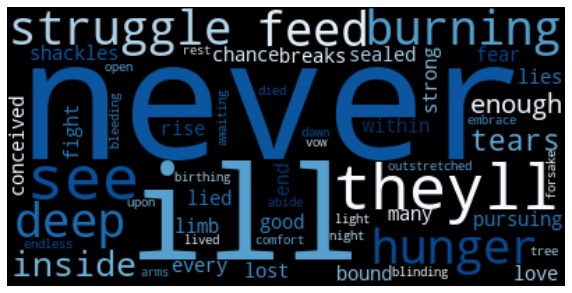

In [20]:
evanescence_word_cloud = WordCloud(max_words=200, background_color="black",stopwords=STOPWORDS, random_state=123, 
                                   colormap='Blues').generate(df_lyrics_evanescence.lyrics_clean[0])
plt.figure(figsize=(10, 10))
plt.imshow(evanescence_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

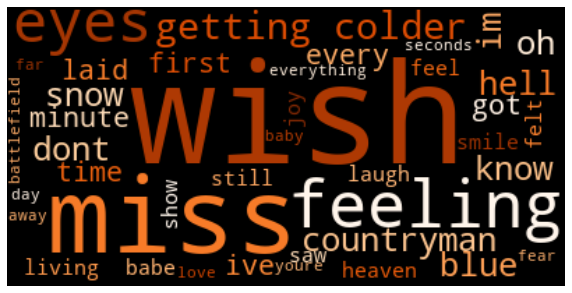

In [21]:
within_temptation_word_cloud = WordCloud(max_words=200, background_color="black",stopwords=STOPWORDS, random_state=123, 
                                   colormap='Oranges').generate(df_lyrics_within_temptation.lyrics_clean[0])
plt.figure(figsize=(10, 10))
plt.imshow(within_temptation_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**CONTINUE...**

# **Sentiment Analysis**